In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.express as  px
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [25]:
athletes_df = pd.read_csv('athlete_events.csv')

athletes_df_removeoutliers_males = athletes_df[athletes_df["Sex"] != "F"]

athletes_df_removeoutliers_females = athletes_df[athletes_df["Sex"] != "M"]

In [26]:

#count every event and region how much is it on data set 
count_discipline = athletes_df.Event.value_counts()
print(count_discipline)
data = pd.read_csv('noc_regions.csv')
count_discipline2 = data.region.value_counts()
print(count_discipline2)

Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Sailing Mixed 18 foot                                     2
Basque Pelota Men's Two-Man Teams With Cesta              2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 765, dtype: int64
Germany           4
Russia            3
Serbia            3
Yemen             3
Czech Republic    3
                 ..
Haiti             1
Nepal             1
North Korea       1
France            1
Pakistan          1
Name: region, Length: 206, dtype: int64


In [27]:
missing_values = athletes_df.isna().sum()/len(athletes_df)*100
missing_values

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

In [28]:
#number of unique values
athletes_df.nunique()


ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

Text(0.5, 1.0, 'Male and Female Count')

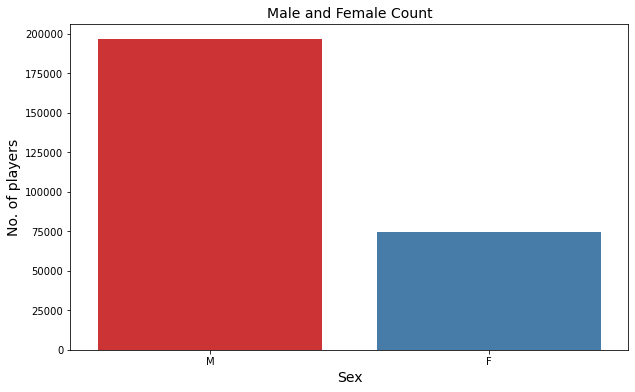

In [29]:
#vis sex
sex =athletes_df.Sex.value_counts().index
No_of_Olympians = athletes_df.Sex.value_counts()

sns.barplot(x = sex,y = No_of_Olympians, palette='Set1')

plt.xlabel("Sex",fontsize = 14)
plt.ylabel("No. of players",fontsize = 14)
plt.title("Male and Female Count",fontsize = 14)

In [30]:
#vis height

fig = px.histogram(athletes_df,
                x = "Height",
                nbins = 90,
                marginal = "box",
                color = "Sex",
                title='Olympians Height Distribution')

fig.update_layout(bargap=0.1)
fig.show()

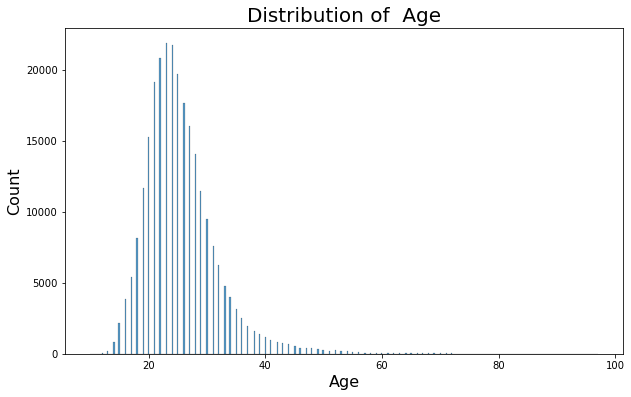

In [31]:
#visualizing the age before cleaning the null values 
ax = sns.histplot(x='Age', data=athletes_df)
ax.set_title(label='Distribution of  Age', fontsize=20)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()


<AxesSubplot:xlabel='Height', ylabel='Weight'>

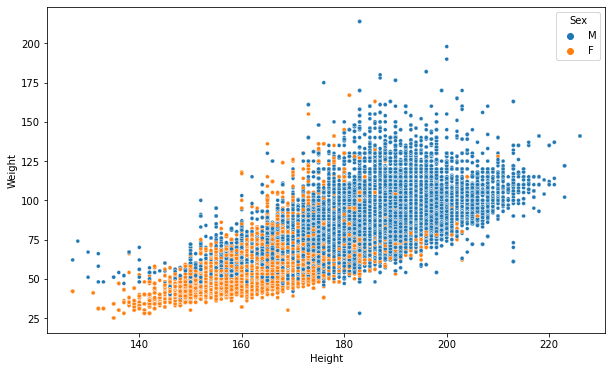

In [32]:
# w vs H
sns.scatterplot(data = athletes_df, x = 'Height',y = 'Weight',hue = 'Sex', s=15)

Text(0.5, 1.0, 'Medals Count')

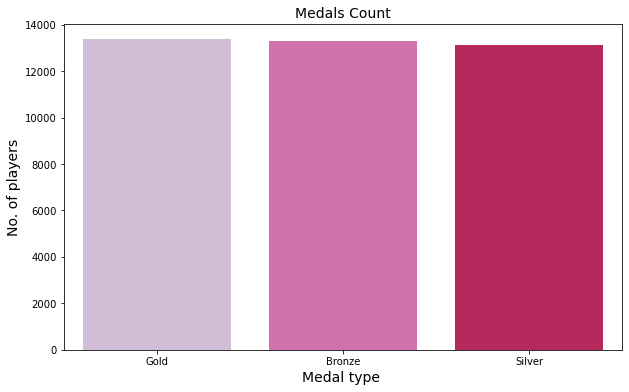

In [33]:
#vis medal
medal =athletes_df.Medal.value_counts().index
No_of_Olympians = athletes_df.Medal.value_counts()

sns.barplot(x=medal,y = No_of_Olympians, palette='PuRd')

plt.xlabel("Medal type ",fontsize = 14)
plt.ylabel("No. of players",fontsize = 14)
plt.title("Medals Count",fontsize = 14)

In [34]:
athletes_df_cleaned = athletes_df
athletes_df_cleaned["Medal"] = athletes_df_cleaned["Medal"].fillna('No Medal')
athletes_df_cleaned

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event     Medal  
0          Basketball               Basketball Men's Basketball  No Medal  
1                Judo              Judo Men's Extra-Lightweight  No Medal  
2            Football                   Football Men's Football  No Medal  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War      Gold  
4       Speed Skating          Speed Skating Women's 500 metres  No Medal  
...               ...                                       ...       ...  
271111           Luge                Luge Mixed (Men)'s Doubles  No Medal  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual  No Medal  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team  No Medal  
271114      Bobsleigh                      Bobsleigh Men's Four  No Medal  
271115      Bobsleigh                      Bobsleigh Men's Four  No Medal  

[271116 rows x 15 columns]

In [35]:
missing_values = athletes_df.isna().sum()/len(athletes_df)*100
missing_values

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal      0.000000
dtype: float64

Text(0.5, 1.0, 'Medals Count')

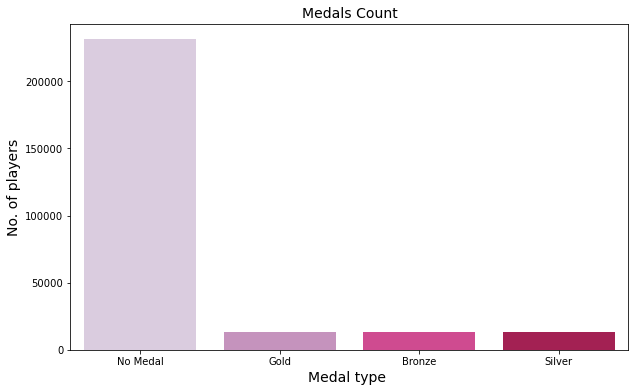

In [36]:
#vis medal after cleaning 
medal =athletes_df.Medal.value_counts().index
No_of_Olympians = athletes_df.Medal.value_counts()

sns.barplot(x=medal,y = No_of_Olympians, palette='PuRd')

plt.xlabel("Medal type ",fontsize = 14)
plt.ylabel("No. of players",fontsize = 14)
plt.title("Medals Count",fontsize = 14)

<AxesSubplot:xlabel='Season'>

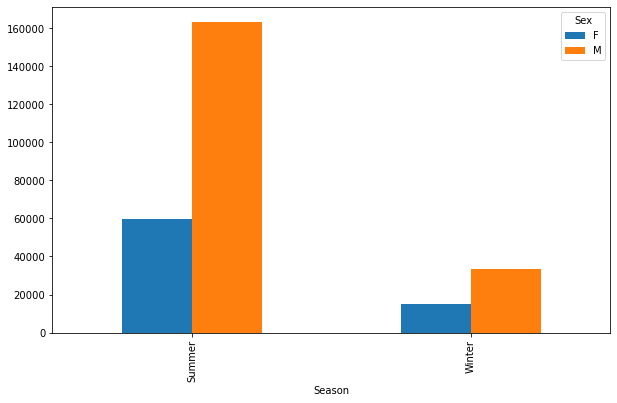

In [37]:
#vis season
season_column = 'Sex'
athletes_df.groupby(["Season", season_column]).size().unstack(level=1).plot(kind='bar')


In [38]:
#cleaning the age by imputing the missing values
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(athletes_df_cleaned[['Age']])
athletes_df_cleaned['Age'] = data=imp.transform(athletes_df_cleaned[['Age']]).ravel()



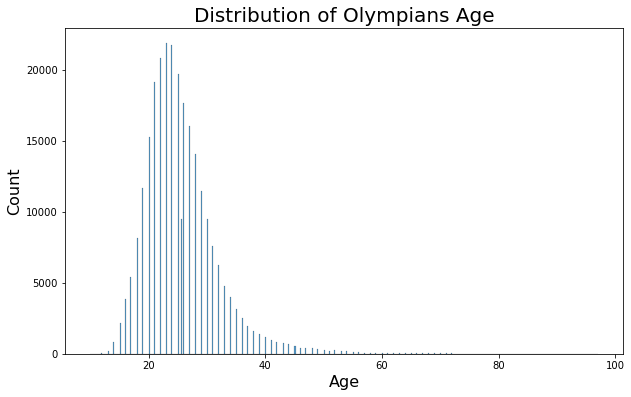

In [39]:
#plot after cleaning
ax = sns.histplot(x='Age', data=athletes_df_cleaned)
ax.set_title(label='Distribution of Olympians Age', fontsize=20)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()


In [40]:
maxval = athletes_df["Height"].max()
print(maxval)

minval = athletes_df["Height"].min()
print(minval)

# Removing Outliers from weight using IQR
Q1 = athletes_df_removeoutliers_males["Weight"].quantile(0.25)
Q3 = athletes_df_removeoutliers_males["Weight"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers_males = athletes_df_removeoutliers_males[~(
    (athletes_df_removeoutliers_males["Weight"] < lowqe_bound) | (athletes_df_removeoutliers_males["Weight"] > upper_bound))]
athletes_df_removeoutliers_males.shape

226.0
127.0
43.0 107.0


(193587, 15)

In [41]:
# Removing Outliers from Heightweight using IQR
Q1 = athletes_df_removeoutliers_males["Height"].quantile(0.25)
Q3 = athletes_df_removeoutliers_males["Height"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers_males = athletes_df_removeoutliers_males[~(
    (athletes_df_removeoutliers_males["Height"] < lowqe_bound) | (athletes_df_removeoutliers_males["Height"] > upper_bound))]
athletes_df_removeoutliers_males.shape


athletes_df_removeoutliers_males["Medal"] = athletes_df_removeoutliers_males["Medal"].fillna(
    "No Medal")


152.5 204.5


In [42]:
Q1 = athletes_df_removeoutliers_females["Weight"].quantile(0.25)
Q3 = athletes_df_removeoutliers_females["Weight"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers_females = athletes_df_removeoutliers_females[~(
    (athletes_df_removeoutliers_females["Weight"] < lowqe_bound) | (athletes_df_removeoutliers_females["Weight"] > upper_bound))]
athletes_df_removeoutliers_females.shape


37.5 81.5


(72204, 15)

In [43]:
# Removing Outliers from Heightweight using IQR
Q1 = athletes_df_removeoutliers_females["Height"].quantile(0.25)
Q3 = athletes_df_removeoutliers_females["Height"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers_females = athletes_df_removeoutliers_females[~(
    (athletes_df_removeoutliers_females["Height"] < lowqe_bound) | (athletes_df_removeoutliers_females["Height"] > upper_bound))]
athletes_df_removeoutliers_females.shape


athletes_df_removeoutliers_females["Medal"] = athletes_df_removeoutliers_females["Medal"].fillna(
    "No Medal")

145.5 189.5


[43. 44. 45. ... nan nan nan]


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[153. 154. 155. ...  nan  nan  nan]


[Text(0.5, 0, 'Height'), Text(0, 0.5, 'Count')]

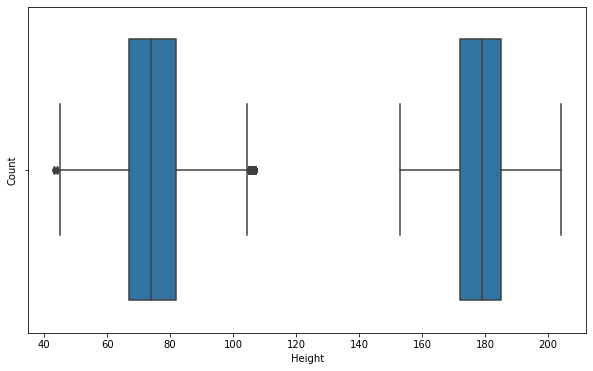

In [44]:
weightdistribution = athletes_df_removeoutliers_males["Weight"]
weightdistributionlist = weightdistribution.sort_values(ascending = True).values.tolist()

print(np.unique(weightdistributionlist))


ax = sns.boxplot(weightdistributionlist)
ax.set(xlabel="Weight",ylabel="Count")

weightdistribution = athletes_df_removeoutliers_males["Height"]
weightdistributionlist = weightdistribution.sort_values(ascending = True).values.tolist()

print(np.unique(weightdistributionlist))


ax = sns.boxplot(weightdistributionlist)
ax.set(xlabel="Height",ylabel="Count")

[38. 39. 40. ... nan nan nan]
[146. 147. 148. ...  nan  nan  nan]


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, 'Height'), Text(0, 0.5, 'Count')]

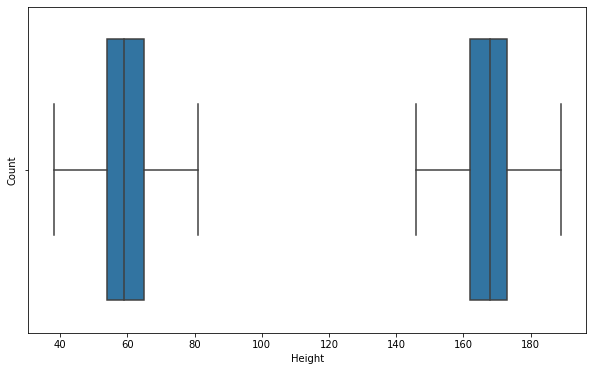

In [45]:
weightdistribution = athletes_df_removeoutliers_females["Weight"]
weightdistributionlist = weightdistribution.sort_values(ascending = True).values.tolist()

print(np.unique(weightdistributionlist))


ax = sns.boxplot(weightdistributionlist)
ax.set(xlabel="Weight",ylabel="Count")

weightdistribution = athletes_df_removeoutliers_females["Height"]
weightdistributionlist = weightdistribution.sort_values(ascending = True).values.tolist()

print(np.unique(weightdistributionlist))


ax = sns.boxplot(weightdistributionlist)
ax.set(xlabel="Height",ylabel="Count")

In [46]:
athletes_df_imputed_males = athletes_df_removeoutliers_males


imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(athletes_df_imputed_males[['Weight']])
athletes_df_imputed_males['Weight'] = data=imp.transform(athletes_df_imputed_males[['Weight']]).ravel()


athletes_df_imputed_males = athletes_df_removeoutliers_males


imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(athletes_df_imputed_males[['Height']])
athletes_df_imputed_males['Height'] = data=imp.transform(athletes_df_imputed_males[['Height']]).ravel()

In [47]:
athletes_df_imputed_females = athletes_df_removeoutliers_females


imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(athletes_df_imputed_females[['Weight']])
athletes_df_imputed_females['Weight'] = data=imp.transform(athletes_df_imputed_females[['Weight']]).ravel()


athletes_df_imputed_females = athletes_df_removeoutliers_females


imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(athletes_df_imputed_females[['Height']])
athletes_df_imputed_females['Height'] = data=imp.transform(athletes_df_imputed_females[['Height']]).ravel()

In [48]:
missing_values =athletes_df_imputed_females.isna().sum()/len(athletes_df)*100
missing_values

ID        0.00000
Name      0.00000
Sex       0.00000
Age       0.15344
Height    0.00000
Weight    0.00000
Team      0.00000
NOC       0.00000
Games     0.00000
Year      0.00000
Season    0.00000
City      0.00000
Sport     0.00000
Event     0.00000
Medal     0.00000
dtype: float64

Text(0.5, 1.0, 'Olympics Male Medalists Weights')

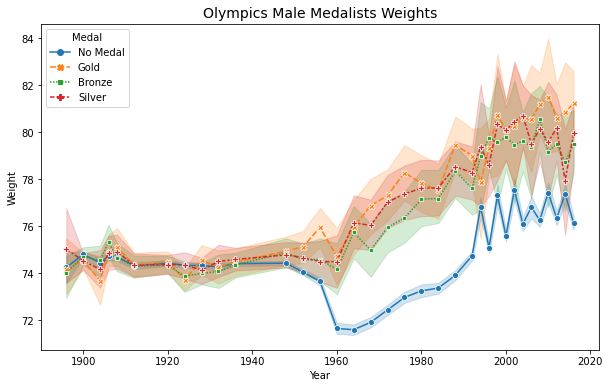

In [49]:
sns.lineplot(x = "Year",y = "Weight",data = athletes_df_imputed_males,hue = "Medal",style = "Medal",markers=True)
plt.title("Olympics Male Medalists Weights",fontsize = 14)

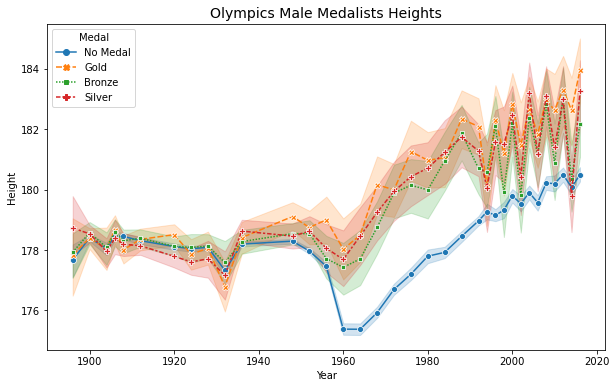

In [50]:
sns.lineplot(x = "Year",y = "Height",data = athletes_df_imputed_males,hue = "Medal",style = "Medal",markers=True)
plt.title("Olympics Male Medalists Heights",fontsize = 14);

In [51]:
#We calculate the percentage of missing values in each attribute after cleaning the attribute (Age)
missing_values = athletes_df_cleaned.isna().sum()/len(athletes_df)*100
missing_values

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.000000
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal      0.000000
dtype: float64

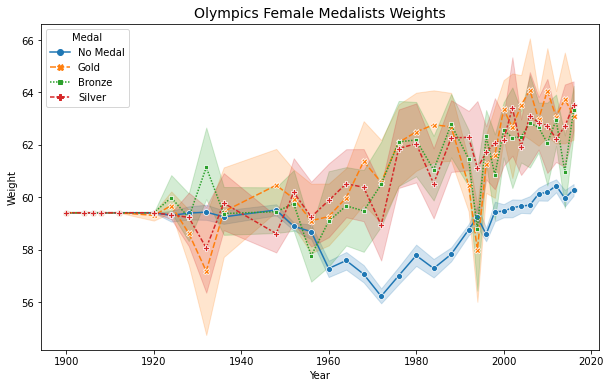

In [52]:
sns.lineplot(x = "Year",y = "Weight",data = athletes_df_imputed_females,hue = "Medal",style = "Medal",markers=True)
plt.title("Olympics Female Medalists Weights",fontsize = 14);

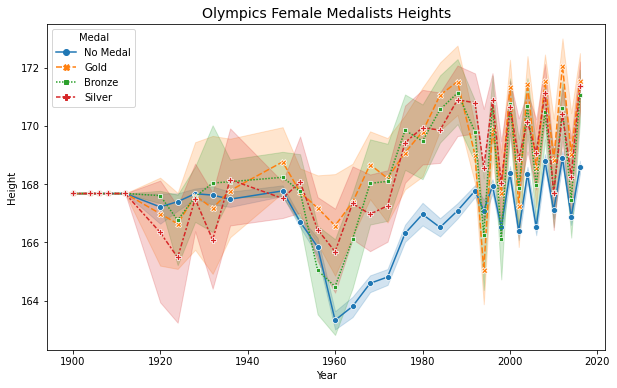

In [53]:
sns.lineplot(x = "Year",y = "Height",data = athletes_df_imputed_females,hue = "Medal",style = "Medal",markers=True)
plt.title("Olympics Female Medalists Heights",fontsize = 14);

In [54]:
#culcuting each type of medals won in top 10 teams
No_Medal_data = athletes_df_cleaned['Medal']==('No Medal')
No_Medal=athletes_df_cleaned[No_Medal_data]
n_No_Medal =No_Medal.groupby("Team")['Medal'].count().sort_values(ascending=False).nlargest(n=10)

#Prints what we just computed
n_No_Medal

Team
United States    12628
France           10438
Great Britain     9731
Italy             8733
Canada            8036
Japan             7378
Germany           7342
Sweden            6618
Australia         6207
Poland            5580
Name: Medal, dtype: int64

Text(0.5, 1.0, 'No Medal medals')

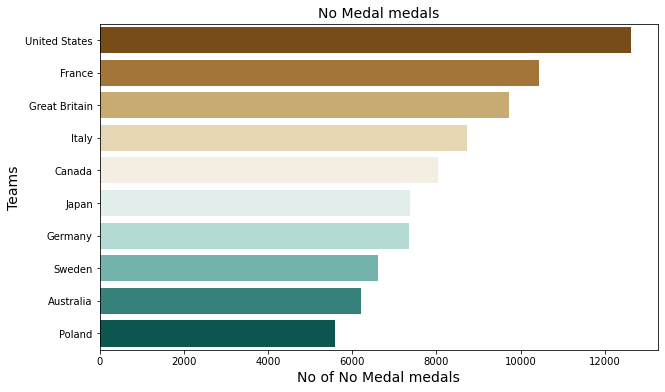

In [55]:
#visualize n_No_Medal medals
No_Medal =n_No_Medal.value_counts().index.sort_values(ascending=False)
g_teams =n_No_Medal.index

sns.barplot(x=No_Medal,y = g_teams, palette='BrBG')

plt.xlabel("No of No Medal medals",fontsize = 14)
plt.ylabel("Teams",fontsize = 14)
plt.title("No Medal medals",fontsize = 14)

In [56]:
gold_data = athletes_df_cleaned['Medal']==('Gold')
Golds=athletes_df_cleaned[gold_data]
n_golds =Golds.groupby("Team")['Medal'].count().sort_values(ascending=False).nlargest(n=10)

#Prints what we just computed
n_golds

Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Gold medals')

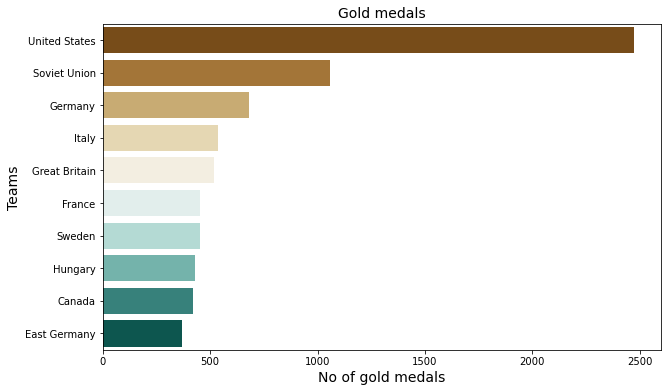

In [57]:
#visualize gold medals
gold_medal =n_golds.value_counts().index.sort_values(ascending=False)
g_teams =n_golds.index

sns.barplot(x=gold_medal,y = g_teams, palette='BrBG')

plt.xlabel("No of gold medals",fontsize = 14)
plt.ylabel("Teams",fontsize = 14)
plt.title("Gold medals",fontsize = 14)